In [1]:
!pip install kaggle

In [1]:
# Upload Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shruthimurugan","key":"6e2b2f5cc1d6a7a43c55c092ccd1433d"}'}

In [2]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
 98% 1.02G/1.04G [00:12<00:00, 149MB/s]
100% 1.04G/1.04G [00:12<00:00, 91.1MB/s]


In [3]:
# Unzip the dataset
!unzip flickr8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed7be3.jpg  
  inflating: Images/2852982055_8112d0

In [4]:
!pip install transformers torch torchvision sentence-transformers ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-3jo0_2d3
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-3jo0_2d3
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=ace9b347e0010eda2492d560cb74474b4869d63509c6c8d943a60b10adc28fae
  Stored in directory: /tmp/pip-ephem-wheel-cache-g6to4t6t/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [7]:
import os

# List all files and directories in the current working directory
for item in os.listdir('.'):
    print(item)


.config
kaggle.json
flickr8k.zip
Images
captions.txt
sample_data


In [8]:
import pandas as pd
# Load the captions file
captions = pd.read_csv('captions.txt', sep='\t', header=None, names=['image', 'caption'])

In [9]:
# Clean the image names for easier access
captions['image'] = captions['image'].apply(lambda x: x.split('#')[0])

In [10]:
# Display the first few rows
captions.head()

,image,caption
0,"image,caption",NaN
1,"1000268201_693b08cb0e.jpg,A child in a pink dr...",NaN
2,"1000268201_693b08cb0e.jpg,A girl going into a ...",NaN
3,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN
4,"1000268201_693b08cb0e.jpg,A little girl climbi...",NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('image').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('image').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image')):
  _plot_series(series, series_name, i)
  fig.legend(title='image', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['image'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='image', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
import torch
import clip
from PIL import Image
import os

In [12]:
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 58.4MiB/s]


In [13]:
# Convert text captions into embeddings
def text_to_embedding(caption):
    text = clip.tokenize([caption]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text)
    return text_features

In [14]:
# Get embedding for a caption(example)
caption_example = "A dog running in the grass"
text_embedding = text_to_embedding(caption_example)
print(text_embedding)

tensor([[ 4.9774e-02, -3.3984e-01, -2.7515e-01,  1.0413e-01,  3.6182e-01,
          4.3774e-01,  1.5491e-01, -3.9893e-01, -3.2080e-01,  3.2129e-01,
          2.4194e-01, -2.8906e-01, -2.7441e-01, -3.4668e-02,  3.1567e-01,
          2.2217e-01,  7.5256e-02,  5.9395e-03, -9.4727e-02,  4.5990e-02,
          9.7778e-02,  5.9296e-02,  3.4521e-01, -1.7969e-01, -6.9275e-03,
         -1.5088e-01,  5.6488e-02,  3.6572e-01,  1.7881e-04, -2.9834e-01,
          2.0862e-01,  1.2317e-01,  5.3131e-02, -4.1040e-01,  7.5012e-02,
         -1.2732e-01,  1.8213e-01,  2.2424e-01, -1.0361e-02,  2.4609e-01,
         -3.8843e-01,  3.5217e-02,  1.8726e-01, -1.1591e-01,  3.0737e-01,
          1.6528e-01,  1.0663e-01, -3.6890e-01,  3.5034e-02, -1.4490e-01,
         -5.1918e-03, -4.9347e-02,  1.2091e-01,  1.1948e-02,  1.6321e-01,
         -3.6768e-01,  3.3984e-01,  1.1462e-01, -1.3330e-01, -2.8534e-02,
          3.4497e-01, -1.4966e-01, -2.2156e-01,  3.7695e-01,  2.9443e-01,
         -2.3767e-01, -1.0950e-01,  9.

In [15]:
from transformers import pipeline

In [18]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.0 MB/s eta 0:00:00


In [19]:
from diffusers import StableDiffusionPipeline
import torch

In [20]:
# Authenticate with Hugging Face
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    use_auth_token=os.getenv("HUGGINGFACE_TOKEN")
)

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': None} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
# Move the model to GPU (if available)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
# Generate an image from a text prompt
prompt = "A futuristic cityscape with flying cars"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

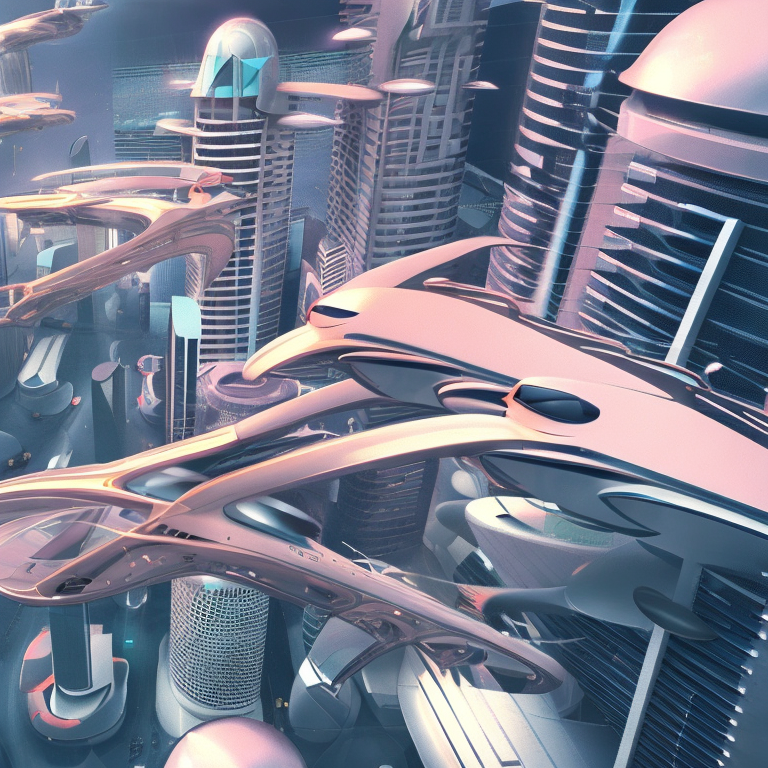

In [24]:
# Display the image
from IPython.display import display
display(image)

In [28]:
#example 2
prompt = "A cat driving cars"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

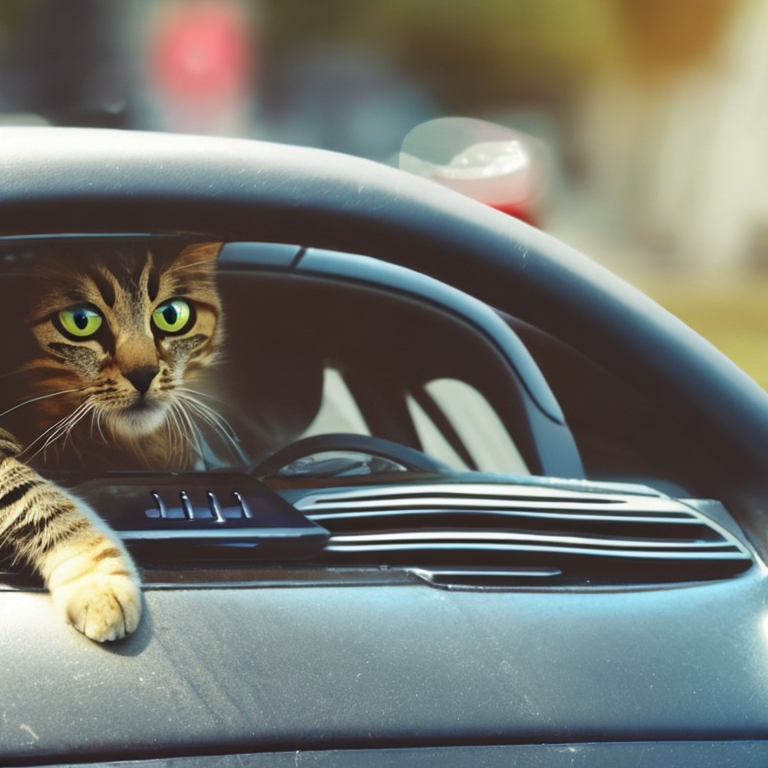

In [29]:
#display the image
from IPython.display import display
display(image)